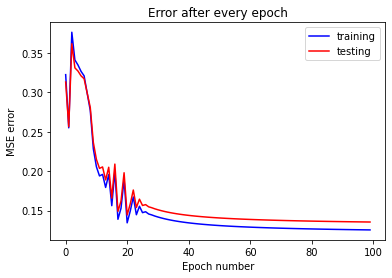

Hidden layer node one parameters: [ 1.21370948 -3.67434735 -7.75683009]
Hidden layer node two parameters: [ 3.21673451 -5.57709141  9.21774577]
Output layer parameters: [ 4.89241317 -5.69900916 -5.56204461]
Observations: The model works well sometimes and does not work well sometimes. This is probably because the error converges to a local minimum. This can also occur because of saddle points as a plateau is expected around saddle points. So the parameters will become close to zero. Another observation is that sometimes the error oscillates vigourously. This occurs because of ravines around optimal or sub-optimal points.


In [1]:
# The following code is a simple implementation of artificial neural networks for Logical XOR operation. T = 1000
# Author: Dishank 

# Importing packages 
import numpy as np
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)


"""
Data generation follows
"""

# Number of samples = T
T = 1000

# Generating data elements
data_elements = np.ones((T,3))
for i in range(T):
    data_elements[i,1] = np.random.choice([0,1])
    data_elements[i,2] = np.random.choice([0,1])

# Generating data labels (Note that logical XOR operation is used)
data_labels = np.zeros(T)
for i in range(T):
    if data_elements[i,1] + data_elements[i,2] == 1:
        data_labels[i] = 1

# Adding noise to data elements
for i in range(T):
    data_elements[i,1:] += np.random.multivariate_normal([0,0], 0.01*np.identity(2))

# Splitting data into training and testing data
# training samples = N, testing samples = M
N = int(0.8*T)
M = int(0.2*T)

training_elements = data_elements[0:N,:]
testing_elements = data_elements[N:T,:]
training_labels = data_labels[0:N]
testing_labels = data_labels[N:T]


"""
Defining some functions and initializing parameters follows
"""

# Defining sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Defining derivative of sigmoid function
def s_d(x):
    return np.exp(-x)/(1+np.exp(-x))**2

# Initialize model parameters randomly, Alpha1[1:3] = Theta[0:2], Alpha2[1:3] = Theta[3:5], Beta[1:3] = Theta[6:8]
theta = np.random.uniform(-3,3,size = 9)

# Minibatch size = m
m = 400

# initialize lists to save training and testing errors
training_error_epoch = []
testing_error_epoch = []

# Define function to save mean square error over training data after every epoch
def training_error_save():
    training_error = (np.linalg.norm(training_labels - predictor(training_elements[:,1], training_elements[:,2])))**2
    training_error_epoch.append(training_error/N)

# Define function to save mean square error over testing data after every epoch
def testing_error_save():
    testing_error = (np.linalg.norm(testing_labels - predictor(testing_elements[:,1], testing_elements[:,2])))**2
    testing_error_epoch.append(testing_error/M)

# Define function to predict the label    
def predictor(a,b):
    return sigmoid(np.matmul(theta[6:9], [1, sigmoid(np.matmul(theta[0:3],[1,a,b])), sigmoid(np.matmul(theta[3:6],[1,a,b]))]))

# Learning Rate = Gamma
Gamma = 0.05

"""
Training the model and saving errors follows
"""

# Train the model(execute the code) for 100 epochs
for i in range(100):
    
    # Number of minibatches = N/m. Thus, for every minibatch, update parameters 
    for j in range(int(N/m)):
        
        # Initialize partial derivatives
        Partial_derivatives = np.zeros(9)
    
        # For every training point in minibatch, compute gradient
        for k in range(m):
            
            # Calculate Alpha1*[1,x1,x2] and Alpha2*[1,x1,x2]
            temp1 = np.matmul(theta[0:3],training_elements[m*j+k,:])
            temp2 = np.matmul(theta[3:6],training_elements[m*j+k,:])

            # Calculate Hidden layer node values
            Z = np.array([1,sigmoid(temp1),sigmoid(temp2)])
            
            # Calculate Beta*Z
            temp3 = np.matmul(theta[6:9], Z)
            
            # Calculate predicted label
            y_predicted = sigmoid(temp3)
            
            # Calculate partial derivatives
            Partial_derivatives[0:3] += -2*(training_labels[m*j+k] - y_predicted)*s_d(temp3)*theta[7]*s_d(temp1)*training_elements[m*j+k,:]
            Partial_derivatives[3:6] += -2*(training_labels[m*j+k] - y_predicted)*s_d(temp3)*theta[8]*s_d(temp2)*training_elements[m*j+k,:]
            Partial_derivatives[6:9] += -2*(training_labels[m*j+k] - y_predicted)*s_d(temp3)*Z
        
        # Update parameters
        theta -= Gamma*Partial_derivatives
            
    # Saving training error at end of each epoch    
    training_error_save()
    testing_error_save()        

    
"""
Reporting results follows
"""

# Visualizing model 
plt.plot(training_error_epoch, 'b-', label = 'training')
plt.plot(testing_error_epoch, 'r-', label = 'testing')
plt.legend()
plt.xlabel("Epoch number")
plt.ylabel("MSE error")
plt.title("Error after every epoch")
plt.show()

# Printing model parameters
print("Hidden layer node one parameters:", theta[0:3])
print("Hidden layer node two parameters:", theta[3:6])
print("Output layer parameters:", theta[6:9])

# Printing observations
print("Observations: The model works well sometimes and does not work well sometimes. This is probably because the error converges to a local minimum. This can also occur because of saddle points as a plateau is expected around saddle points. So the parameters will become close to zero. Another observation is that sometimes the error oscillates vigourously. This occurs because of ravines around optimal or sub-optimal points.")


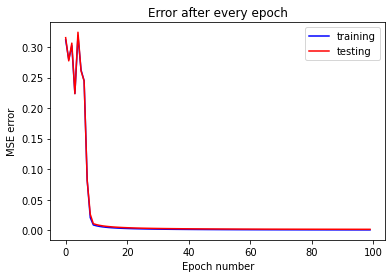

Hidden layer node one parameters: [ 3.31773656 -6.74016775 -6.76738619]
Hidden layer node two parameters: [-9.88026352  6.35872335  6.43194731]
Output layer parameters: [ 4.89085423 -9.77264484 -9.80853478]
Observations: The model works well sometimes and does not work well sometimes. This is probably because the error converges to a local minimum. This can also occur because of saddle points as a plateau is expected around saddle points. So the parameters will become close to zero. Another observation is that sometimes the error oscillates vigourously. This occurs because of ravines around optimal or sub-optimal points.


In [2]:
# The following code is a simple implementation of artificial neural networks for Logical XOR operation. T = 2500
# Author: Dishank 

# Importing packages 
import numpy as np
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)


"""
Data generation follows
"""

# Number of samples = T
T = 2500

# Generating data elements
data_elements = np.ones((T,3))
for i in range(T):
    data_elements[i,1] = np.random.choice([0,1])
    data_elements[i,2] = np.random.choice([0,1])

# Generating data labels (Note that logical XOR operation is used)
data_labels = np.zeros(T)
for i in range(T):
    if data_elements[i,1] + data_elements[i,2] == 1:
        data_labels[i] = 1

# Adding noise to data elements
for i in range(T):
    data_elements[i,1:] += np.random.multivariate_normal([0,0], 0.01*np.identity(2))

# Splitting data into training and testing data
# training samples = N, testing samples = M
N = int(0.8*T)
M = int(0.2*T)

training_elements = data_elements[0:N,:]
testing_elements = data_elements[N:T,:]
training_labels = data_labels[0:N]
testing_labels = data_labels[N:T]


"""
Defining some functions and initializing parameters follows
"""

# Defining sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Defining derivative of sigmoid function
def s_d(x):
    return np.exp(-x)/(1+np.exp(-x))**2

# Initialize model parameters randomly, Alpha1[1:3] = Theta[0:2], Alpha2[1:3] = Theta[3:5], Beta[1:3] = Theta[6:8]
theta = np.random.uniform(-3,3,size = 9)

# Minibatch size = m
m = 400

# initialize lists to save training and testing errors
training_error_epoch = []
testing_error_epoch = []

# Define function to save mean square error over training data after every epoch
def training_error_save():
    training_error = (np.linalg.norm(training_labels - predictor(training_elements[:,1], training_elements[:,2])))**2
    training_error_epoch.append(training_error/N)

# Define function to save mean square error over testing data after every epoch
def testing_error_save():
    testing_error = (np.linalg.norm(testing_labels - predictor(testing_elements[:,1], testing_elements[:,2])))**2
    testing_error_epoch.append(testing_error/M)

# Define function to predict the label    
def predictor(a,b):
    return sigmoid(np.matmul(theta[6:9], [1, sigmoid(np.matmul(theta[0:3],[1,a,b])), sigmoid(np.matmul(theta[3:6],[1,a,b]))]))

# Learning Rate = Gamma
Gamma = 0.05

"""
Training the model and saving errors follows
"""

# Train the model(execute the code) for 100 epochs
for i in range(100):
    
    # Number of minibatches = N/m. Thus, for every minibatch, update parameters 
    for j in range(int(N/m)):
        
        # Initialize partial derivatives
        Partial_derivatives = np.zeros(9)
    
        # For every training point in minibatch, compute gradient
        for k in range(m):
            
            # Calculate Alpha1*[1,x1,x2] and Alpha2*[1,x1,x2]
            temp1 = np.matmul(theta[0:3],training_elements[m*j+k,:])
            temp2 = np.matmul(theta[3:6],training_elements[m*j+k,:])

            # Calculate Hidden layer node values
            Z = np.array([1,sigmoid(temp1),sigmoid(temp2)])
            
            # Calculate Beta*Z
            temp3 = np.matmul(theta[6:9], Z)
            
            # Calculate predicted label
            y_predicted = sigmoid(temp3)
            
            # Calculate partial derivatives
            Partial_derivatives[0:3] += -2*(training_labels[m*j+k] - y_predicted)*s_d(temp3)*theta[7]*s_d(temp1)*training_elements[m*j+k,:]
            Partial_derivatives[3:6] += -2*(training_labels[m*j+k] - y_predicted)*s_d(temp3)*theta[8]*s_d(temp2)*training_elements[m*j+k,:]
            Partial_derivatives[6:9] += -2*(training_labels[m*j+k] - y_predicted)*s_d(temp3)*Z
        
        # Update parameters
        theta -= Gamma*Partial_derivatives
            
    # Saving training error at end of each epoch    
    training_error_save()
    testing_error_save()        

    
"""
Reporting results follows
"""

# Visualizing model 
plt.plot(training_error_epoch, 'b-', label = 'training')
plt.plot(testing_error_epoch, 'r-', label = 'testing')
plt.legend()
plt.xlabel("Epoch number")
plt.ylabel("MSE error")
plt.title("Error after every epoch")
plt.show()

# Printing model parameters
print("Hidden layer node one parameters:", theta[0:3])
print("Hidden layer node two parameters:", theta[3:6])
print("Output layer parameters:", theta[6:9])

# Printing observations
print("Observations: The model works well sometimes and does not work well sometimes. This is probably because the error converges to a local minimum. This can also occur because of saddle points as a plateau is expected around saddle points. So the parameters will become close to zero. Another observation is that sometimes the error oscillates vigourously. This occurs because of ravines around optimal or sub-optimal points.")


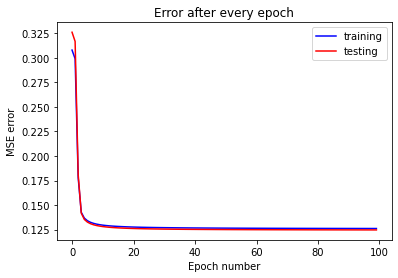

Hidden layer node one parameters: [  1.89343667 -10.52971513  -4.48611665]
Hidden layer node two parameters: [ -2.9207175  -11.11406091   5.30793363]
Output layer parameters: [ 0.12855844 -7.09672761  6.97349883]
Observations: The model works well sometimes and does not work well sometimes. This is probably because the error converges to a local minimum. This can also occur because of saddle points as a plateau is expected around saddle points. So the parameters will become close to zero. Another observation is that sometimes the error oscillates vigourously. This occurs because of ravines around optimal or sub-optimal points.


In [3]:
# The following code is a simple implementation of artificial neural networks for Logical XOR operation. T = 5000
# Author: Dishank 

# Importing packages 
import numpy as np
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)


"""
Data generation follows
"""

# Number of samples = T
T = 5000

# Generating data elements
data_elements = np.ones((T,3))
for i in range(T):
    data_elements[i,1] = np.random.choice([0,1])
    data_elements[i,2] = np.random.choice([0,1])

# Generating data labels (Note that logical XOR operation is used)
data_labels = np.zeros(T)
for i in range(T):
    if data_elements[i,1] + data_elements[i,2] == 1:
        data_labels[i] = 1

# Adding noise to data elements
for i in range(T):
    data_elements[i,1:] += np.random.multivariate_normal([0,0], 0.01*np.identity(2))

# Splitting data into training and testing data
# training samples = N, testing samples = M
N = int(0.8*T)
M = int(0.2*T)

training_elements = data_elements[0:N,:]
testing_elements = data_elements[N:T,:]
training_labels = data_labels[0:N]
testing_labels = data_labels[N:T]


"""
Defining some functions and initializing parameters follows
"""

# Defining sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Defining derivative of sigmoid function
def s_d(x):
    return np.exp(-x)/(1+np.exp(-x))**2

# Initialize model parameters randomly, Alpha1[1:3] = Theta[0:2], Alpha2[1:3] = Theta[3:5], Beta[1:3] = Theta[6:8]
theta = np.random.uniform(-3,3,size = 9)

# Minibatch size = m
m = 400

# initialize lists to save training and testing errors
training_error_epoch = []
testing_error_epoch = []

# Define function to save mean square error over training data after every epoch
def training_error_save():
    training_error = (np.linalg.norm(training_labels - predictor(training_elements[:,1], training_elements[:,2])))**2
    training_error_epoch.append(training_error/N)

# Define function to save mean square error over testing data after every epoch
def testing_error_save():
    testing_error = (np.linalg.norm(testing_labels - predictor(testing_elements[:,1], testing_elements[:,2])))**2
    testing_error_epoch.append(testing_error/M)

# Define function to predict the label    
def predictor(a,b):
    return sigmoid(np.matmul(theta[6:9], [1, sigmoid(np.matmul(theta[0:3],[1,a,b])), sigmoid(np.matmul(theta[3:6],[1,a,b]))]))

# Learning Rate = Gamma
Gamma = 0.05

"""
Training the model and saving errors follows
"""

# Train the model(execute the code) for 100 epochs
for i in range(100):
    
    # Number of minibatches = N/m. Thus, for every minibatch, update parameters 
    for j in range(int(N/m)):
        
        # Initialize partial derivatives
        Partial_derivatives = np.zeros(9)
    
        # For every training point in minibatch, compute gradient
        for k in range(m):
            
            # Calculate Alpha1*[1,x1,x2] and Alpha2*[1,x1,x2]
            temp1 = np.matmul(theta[0:3],training_elements[m*j+k,:])
            temp2 = np.matmul(theta[3:6],training_elements[m*j+k,:])

            # Calculate Hidden layer node values
            Z = np.array([1,sigmoid(temp1),sigmoid(temp2)])
            
            # Calculate Beta*Z
            temp3 = np.matmul(theta[6:9], Z)
            
            # Calculate predicted label
            y_predicted = sigmoid(temp3)
            
            # Calculate partial derivatives
            Partial_derivatives[0:3] += -2*(training_labels[m*j+k] - y_predicted)*s_d(temp3)*theta[7]*s_d(temp1)*training_elements[m*j+k,:]
            Partial_derivatives[3:6] += -2*(training_labels[m*j+k] - y_predicted)*s_d(temp3)*theta[8]*s_d(temp2)*training_elements[m*j+k,:]
            Partial_derivatives[6:9] += -2*(training_labels[m*j+k] - y_predicted)*s_d(temp3)*Z
        
        # Update parameters
        theta -= Gamma*Partial_derivatives
            
    # Saving training error at end of each epoch    
    training_error_save()
    testing_error_save()        

    
"""
Reporting results follows
"""

# Visualizing model 
plt.plot(training_error_epoch, 'b-', label = 'training')
plt.plot(testing_error_epoch, 'r-', label = 'testing')
plt.legend()
plt.xlabel("Epoch number")
plt.ylabel("MSE error")
plt.title("Error after every epoch")
plt.show()

# Printing model parameters
print("Hidden layer node one parameters:", theta[0:3])
print("Hidden layer node two parameters:", theta[3:6])
print("Output layer parameters:", theta[6:9])

# Printing observations
print("Observations: The model works well sometimes and does not work well sometimes. This is probably because the error converges to a local minimum. This can also occur because of saddle points as a plateau is expected around saddle points. So the parameters will become close to zero. Another observation is that sometimes the error oscillates vigourously. This occurs because of ravines around optimal or sub-optimal points.")
